# 10분 판타스 과정 - 실습해보면 2-3시간 걸림

In [2]:
import numpy as np
import pandas as pd

# 1.Object Creation (판다스 객체 생성)

생성방법 
pd.Series()경우 매개변수로 리스트와, index값을 넣어줘서 생성 index를 넣어주지 않으면 0부터 자동생성됩니다.
pd.DataFrame()의 경우는 리트트와 index, 칼럼을 넣어줘서 생성, 딕션어리 형식으로 칼럼:데이타로 넣어도 됨

In [202]:
# 함수에 리스트를 넣어서 생성
# 1차원 배열을 판다스로 생성 벡터
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [203]:
# 데이트 를 생성해서 인덱스로 사용할수있다
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

### 2차원 데이타 생성
함수에 리스트(또는 생성함수), 인덱스, 칼럼을 넣어서 생성


 > 아래의 np.random.randn(6,4) 
 평균이 0이고 표준편차가 1인 6x4의 난수
 인덱스에 데이트인덱스로 생성한 것이 들어감


In [204]:

df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))


In [205]:

# 함수에 딕션어리를 넣어서도 생성가능
# 판다스의 칼럼은 float64, int32,int64, bool, datetime64, np.array, pd.Categorical등을 가질수있다
# 칼럼별로 ({ 'A' : 이런식으로 설정가능함})

df2 = pd.DataFrame({'A': 1.,
                    'B': pd.Timestamp('20130102'),
                    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                    'D': np.array([3] * 4, dtype='int32'),
                    'E': pd.Categorical(["test", "train", "test", "train"]),
                    'F': 'foo'})
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [206]:
df2.dtypes  # 칼럼은 모두 다른 타입을 가질수있다

A          float64
B    datetime64[s]
C          float32
D            int32
E         category
F           object
dtype: object

다양한 방법으로 데이터를 선택가능
df2.A                  df2.bool
df2.abs                df2.boxplot
df2.add                df2.C
df2.add_prefix         df2.clip
df2.add_suffix         df2.clip_lower
df2.align              df2.clip_upper
df2.all                df2.columns
df2.any                df2.combine
df2.append             df2.combine_first
df2.apply              df2.consolidate
df2.applymap
df2.D

 # 2. 데이타보기
 객체 내부 함수로 데이타를 보는 기능

In [207]:
df.head()  # 상위 5개 보기

,A,B,C,D
2013-01-01,-0.277411,1.824859,-2.467046,0.734033
2013-01-02,-1.546854,0.220631,-0.683225,-0.563278
2013-01-03,-0.006661,-0.046632,-0.717066,0.718454
2013-01-04,0.066167,-0.940848,-0.895081,0.830548
2013-01-05,2.438738,0.052364,-0.675710,-0.461090


In [208]:
df.tail(3)  # 하위 3개 보기

,A,B,C,D
2013-01-04,0.066167,-0.940848,-0.895081,0.830548
2013-01-05,2.438738,0.052364,-0.675710,-0.461090
2013-01-06,-1.457673,-1.974274,0.719050,0.318653


In [209]:
df.index  # 인덱스보기

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [210]:
df.columns  #칼럼보기

Index(['A', 'B', 'C', 'D'], dtype='object')

Numpy 는 배열하나가 하나의 타입을 가지지만 판다스는 칼럼당 하나의 dtype을 가집니다
따라서  DataFrame.to_numpy() 는 자원을 많이 소모하게됩니다.
하나의 타입인 df 경우 빠르고 데이타 복사가 필요하지 않습니다.

In [211]:
df.to_numpy()  # numpy로 변환

array([[-0.27741098,  1.82485868, -2.4670462 ,  0.7340334 ],
       [-1.54685408,  0.22063144, -0.68322482, -0.56327765],
       [-0.00666072, -0.04663167, -0.7170661 ,  0.71845372],
       [ 0.06616733, -0.94084798, -0.89508097,  0.83054847],
       [ 2.43873778,  0.05236354, -0.67570992, -0.46108967],
       [-1.45767258, -1.97427391,  0.71904982,  0.31865301]])

하지만 df2는 여러타입으로 자원을 많이 소모합니다.

In [212]:
df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

> 메모

> DataFrame.to_numpy()출력에 인덱스 또는 열 레이블이 포함되지 않습니다 .

In [213]:
# 데이타에 대한 빠른 통계요약을 보여줍니다.
# 빈도수, 평균, 표준편차 최소 25% 50% 75% 최대값
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.130616,-0.143983,-0.786513,0.262887
std,1.445270,1.268248,1.012963,0.626348
min,-1.546854,-1.974274,-2.467046,-0.563278
25%,-1.162607,-0.717294,-0.850577,-0.266154
50%,-0.142036,0.002866,-0.700145,0.518553
75%,0.047960,0.178564,-0.677589,0.730138
max,2.438738,1.824859,0.719050,0.830548


In [214]:
# 데이터를 전치합니다.
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-0.277411,-1.546854,-0.006661,0.066167,2.438738,-1.457673
B,1.824859,0.220631,-0.046632,-0.940848,0.052364,-1.974274
C,-2.467046,-0.683225,-0.717066,-0.895081,-0.675710,0.719050
D,0.734033,-0.563278,0.718454,0.830548,-0.461090,0.318653


In [215]:
# 칼럼을정열을 합니다. 내림차순이라 DCBA axis=1 방향으로 정열
df.sort_index(axis=1, ascending=False)


,D,C,B,A
2013-01-01,0.734033,-2.467046,1.824859,-0.277411
2013-01-02,-0.563278,-0.683225,0.220631,-1.546854
2013-01-03,0.718454,-0.717066,-0.046632,-0.006661
2013-01-04,0.830548,-0.895081,-0.940848,0.066167
2013-01-05,-0.461090,-0.675710,0.052364,2.438738
2013-01-06,0.318653,0.719050,-1.974274,-1.457673


In [216]:
df.sort_values(by='B')  # B칼럼을 기준으로 정렬

,A,B,C,D
2013-01-06,-1.457673,-1.974274,0.719050,0.318653
2013-01-04,0.066167,-0.940848,-0.895081,0.830548
2013-01-03,-0.006661,-0.046632,-0.717066,0.718454
2013-01-05,2.438738,0.052364,-0.675710,-0.461090
2013-01-02,-1.546854,0.220631,-0.683225,-0.563278
2013-01-01,-0.277411,1.824859,-2.467046,0.734033


In [217]:
# 참고 판다스 axis=0, axis=1 방향에 대해서

import pandas as pd

data = {'A': [1, 2, 3], 'B': [4, 5, 6], 'C': [7, 8, 9]}
sd = pd.DataFrame(data)

# 열 방향으로 합계 계산 (각 열의 합)
column_sum = sd.sum(axis=0)

# 행 방향으로 합계 계산 (각 행의 합)
row_sum = sd.sum(axis=1)

print(column_sum)
print(row_sum)

A     6
B    15
C    24
dtype: int64
0    12
1    15
2    18
dtype: int64


# 데이타선택
```칼럼은 라벨링으로 로우는 인덱싱으로 합니다.```

In [218]:
# 칼럼선택
df['A']

2013-01-01   -0.277411
2013-01-02   -1.546854
2013-01-03   -0.006661
2013-01-04    0.066167
2013-01-05    2.438738
2013-01-06   -1.457673
Freq: D, Name: A, dtype: float64

In [219]:
df[0:3]  # row선택

,A,B,C,D
2013-01-01,-0.277411,1.824859,-2.467046,0.734033
2013-01-02,-1.546854,0.220631,-0.683225,-0.563278
2013-01-03,-0.006661,-0.046632,-0.717066,0.718454


### df.loc
라벨을 활용한 선택 
라벨을 활용하는 방식으로 데이타의 특정구간을 선택할수있습니다.

In [220]:
# 특정 값을 라벨링으로 가져오기
df.loc['20130102', 'A']

-1.5468540819774068

In [221]:
# 라벨을 활용하는 방식으로 데이타의 특정구간을 선택할수있습니다.

# 라벨링방식이므로 인덱싱을 활용하는 스라이싱은 안됨 
# df.loc[2:3] 에러남
df.loc['20130102']


A   -1.546854
B    0.220631
C   -0.683225
D   -0.563278
Name: 2013-01-02 00:00:00, dtype: float64

In [222]:
# df.loc[dates[0]]
# 다만 인덱싱하는 자료형 자체로는 슬라이싱가능
df.loc[dates[:]]

,A,B,C,D
2013-01-01,-0.277411,1.824859,-2.467046,0.734033
2013-01-02,-1.546854,0.220631,-0.683225,-0.563278
2013-01-03,-0.006661,-0.046632,-0.717066,0.718454
2013-01-04,0.066167,-0.940848,-0.895081,0.830548
2013-01-05,2.438738,0.052364,-0.675710,-0.461090
2013-01-06,-1.457673,-1.974274,0.719050,0.318653


In [223]:
df.loc[:, ['A', 'B']]  # A,B칼럼을 모두 선택 

,A,B
2013-01-01,-0.277411,1.824859
2013-01-02,-1.546854,0.220631
2013-01-03,-0.006661,-0.046632
2013-01-04,0.066167,-0.940848
2013-01-05,2.438738,0.052364
2013-01-06,-1.457673,-1.974274


In [224]:
# 라벨을 활용한 슬라이싱
df.loc['20130102':'20130104', ['A', 'B']]

,A,B
2013-01-02,-1.546854,0.220631
2013-01-03,-0.006661,-0.046632
2013-01-04,0.066167,-0.940848


# 위치로 선택하기
df.iloc
인덱싱으로 자료를 출력합니다.

In [225]:

df.iloc[3]  # 3번째 row를 선택

A    0.066167
B   -0.940848
C   -0.895081
D    0.830548
Name: 2013-01-04 00:00:00, dtype: float64

In [226]:
df.iloc[3:5, 0:2]  # 슬라이싱가능

,A,B
2013-01-04,0.066167,-0.940848
2013-01-05,2.438738,0.052364


In [227]:
df.iloc[[1, 2, 4], [0, 2]]  # 1,2,4번째 row와 0,2번째 칼럼을 선택

,A,C
2013-01-02,-1.546854,-0.683225
2013-01-03,-0.006661,-0.717066
2013-01-05,2.438738,-0.675710


In [228]:
df.iloc[1:3, :]  # 1~2번째 row와 모든 칼럼을 선택

,A,B,C,D
2013-01-02,-1.546854,0.220631,-0.683225,-0.563278
2013-01-03,-0.006661,-0.046632,-0.717066,0.718454


In [229]:
df.iloc[0, 0]  # 특정값 구하기

-0.2774109810571349

In [230]:
df.iat[0, 0]  # 빠른 선택값 구하기

-0.2774109810571349

### 불리언 인덱싱
참값에 해당하는 자료를 검색합니다.

In [231]:
df[df['A'] > 0]  # row 에서 A칼럼의 값이 0보다 큰 것

,A,B,C,D
2013-01-04,0.066167,-0.940848,-0.895081,0.830548
2013-01-05,2.438738,0.052364,-0.675710,-0.461090


In [232]:
df[df > 0]  # 불리언 조건을 충족하는 데이터프레임에서 값을 선택합니다.

,A,B,C,D
2013-01-01,NaN,1.824859,NaN,0.734033
2013-01-02,NaN,0.220631,NaN,NaN
2013-01-03,NaN,NaN,NaN,0.718454
2013-01-04,0.066167,NaN,NaN,0.830548
2013-01-05,2.438738,0.052364,NaN,NaN
2013-01-06,NaN,NaN,0.71905,0.318653


### isin() 메소드를 활용한 필터링

In [233]:
df2 = df.copy()  # df2에 df를 복사
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']  # E칼럼에 one,one,two,three,four,three를 넣음
df2

,A,B,C,D,E
2013-01-01,-0.277411,1.824859,-2.467046,0.734033,one
2013-01-02,-1.546854,0.220631,-0.683225,-0.563278,one
2013-01-03,-0.006661,-0.046632,-0.717066,0.718454,two
2013-01-04,0.066167,-0.940848,-0.895081,0.830548,three
2013-01-05,2.438738,0.052364,-0.675710,-0.461090,four
2013-01-06,-1.457673,-1.974274,0.719050,0.318653,three


In [234]:
df2[df2['E'].isin(['two', 'four'])]  # E칼럼에서 two,four를 선택

,A,B,C,D,E
2013-01-03,-0.006661,-0.046632,-0.717066,0.718454,two
2013-01-05,2.438738,0.052364,-0.675710,-0.461090,four


### 값을 넣기 (Setting)

In [235]:

# 새로운 칼럼을 넣기
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range('20130101', periods=6))
df['F'] = s1  # 새로운 칼럼을 지정하고 Serises를 넣습니다.
df

,A,B,C,D,F
2013-01-01,-0.277411,1.824859,-2.467046,0.734033,1
2013-01-02,-1.546854,0.220631,-0.683225,-0.563278,2
2013-01-03,-0.006661,-0.046632,-0.717066,0.718454,3
2013-01-04,0.066167,-0.940848,-0.895081,0.830548,4
2013-01-05,2.438738,0.052364,-0.675710,-0.461090,5
2013-01-06,-1.457673,-1.974274,0.719050,0.318653,6


In [236]:
# 라벨링으로 세팅
df.at[dates[0], 'A'] = 0
df.at[dates[0], 'A']

0.0

In [237]:
# 인덱싱으로 세팅
df.iat[0, 1] = 1
df.iat[0, 1]

1.0

In [238]:
# 라벨값으로 세팅
df.loc[:, 'D'] = np.array([5] * len(df))
df

,A,B,C,D,F
2013-01-01,0.000000,1.000000,-2.467046,5.0,1
2013-01-02,-1.546854,0.220631,-0.683225,5.0,2
2013-01-03,-0.006661,-0.046632,-0.717066,5.0,3
2013-01-04,0.066167,-0.940848,-0.895081,5.0,4
2013-01-05,2.438738,0.052364,-0.675710,5.0,5
2013-01-06,-1.457673,-1.974274,0.719050,5.0,6


### 누락된 데이타( Missing data)
연산에 포함되지 않은 누락된 데이타를 np.nan으로 표현합니다.

In [239]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1], 'E'] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,1.000000,-2.467046,5.0,1,1.0
2013-01-02,-1.546854,0.220631,-0.683225,5.0,2,1.0
2013-01-03,-0.006661,-0.046632,-0.717066,5.0,3,NaN
2013-01-04,0.066167,-0.940848,-0.895081,5.0,4,NaN


In [240]:
# 누락된 데이타가 있는 로우는 제거하고 보여줌
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-01,0.000000,1.000000,-2.467046,5.0,1,1.0
2013-01-02,-1.546854,0.220631,-0.683225,5.0,2,1.0


In [241]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,1.000000,-2.467046,5.0,1,1.0
2013-01-02,-1.546854,0.220631,-0.683225,5.0,2,1.0
2013-01-03,-0.006661,-0.046632,-0.717066,5.0,3,5.0
2013-01-04,0.066167,-0.940848,-0.895081,5.0,4,5.0


In [242]:
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,False,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


# 연산
### 통계

In [243]:
df.mean()  #df.mean(0) 0축방향으로 더해서 평균을 냄

A   -0.084380
B   -0.281460
C   -0.786513
D    5.000000
F    3.500000
dtype: float64

In [244]:
df.mean(1)  # axis 1로 평균을 냄

2013-01-01    0.906591
2013-01-02    0.998111
2013-01-03    1.445928
2013-01-04    1.446048
2013-01-05    2.363078
2013-01-06    1.657421
Freq: D, dtype: float64

### 브로드캐스팅 연산

In [245]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [246]:
# 빼기 연산을 axis =0으로 하면 모든 ax=0 방향으로 브로드캐스팅해서 빼서 보여줌
df.sub(s, axis=0)


,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-1.006661,-1.046632,-1.717066,4.0,2.0
2013-01-04,-2.933833,-3.940848,-3.895081,2.0,1.0
2013-01-05,-2.561262,-4.947636,-5.675710,0.0,0.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


### 함수적용

In [247]:
df

,A,B,C,D,F
2013-01-01,0.000000,1.000000,-2.467046,5.0,1
2013-01-02,-1.546854,0.220631,-0.683225,5.0,2
2013-01-03,-0.006661,-0.046632,-0.717066,5.0,3
2013-01-04,0.066167,-0.940848,-0.895081,5.0,4
2013-01-05,2.438738,0.052364,-0.675710,5.0,5
2013-01-06,-1.457673,-1.974274,0.719050,5.0,6


In [248]:
df.apply(np.cumsum)  # 누적값을 구함

,A,B,C,D,F
2013-01-01,0.000000,1.000000,-2.467046,5.0,1
2013-01-02,-1.546854,1.220631,-3.150271,10.0,3
2013-01-03,-1.553515,1.174000,-3.867337,15.0,6
2013-01-04,-1.487347,0.233152,-4.762418,20.0,10
2013-01-05,0.951390,0.285515,-5.438128,25.0,15
2013-01-06,-0.506282,-1.688759,-4.719078,30.0,21


In [250]:
df.apply(lambda x: x.max() - x.min())  # 람다함수적용

A    3.985592
B    2.974274
C    3.186096
D    0.000000
F    5.000000
dtype: float64

### 히스토그램

In [251]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    2
1    2
2    1
3    3
4    1
5    6
6    5
7    2
8    0
9    5
dtype: int32

In [252]:
# 빈도카운트
s.value_counts()

2    3
1    2
5    2
3    1
6    1
0    1
Name: count, dtype: int64

#  Merge (합치기)
### concat
concat을활용해서 판다스 오브젝트를 합칠수있습니다.

In [253]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,-0.660903,0.299074,-1.000110,1.417365
1,0.271427,1.362915,0.129024,-0.356219
2,0.762969,0.437829,0.090836,-1.438120
3,0.307344,1.319163,1.480576,0.295602
4,0.644071,1.478687,-1.046433,-0.608002
5,-0.132562,-0.556877,0.740029,-0.821308
6,-0.584497,-0.094896,-0.547430,0.246384
7,-0.033542,-1.222817,0.904427,0.698734
8,0.223567,-1.488808,1.207475,-0.220255
9,-0.203079,1.030637,-0.335949,0.201245


In [254]:
# 생성한 데이타를 조각내봅니다.
pieces = [df[:3], df[3:7], df[7:]]
print(pieces[0])

# 조각낸 것을 디펄트값을 0이지만 1로 해보면 다른 결과가 나오는걸 볼수있습니다.
print(pd.concat(pieces, axis=0))
print(pd.concat(pieces, axis=1))

          0         1         2         3
0 -0.660903  0.299074 -1.000110  1.417365
1  0.271427  1.362915  0.129024 -0.356219
2  0.762969  0.437829  0.090836 -1.438120
          0         1         2         3
0 -0.660903  0.299074 -1.000110  1.417365
1  0.271427  1.362915  0.129024 -0.356219
2  0.762969  0.437829  0.090836 -1.438120
3  0.307344  1.319163  1.480576  0.295602
4  0.644071  1.478687 -1.046433 -0.608002
5 -0.132562 -0.556877  0.740029 -0.821308
6 -0.584497 -0.094896 -0.547430  0.246384
7 -0.033542 -1.222817  0.904427  0.698734
8  0.223567 -1.488808  1.207475 -0.220255
9 -0.203079  1.030637 -0.335949  0.201245
          0         1         2         3         0         1         2  \
0 -0.660903  0.299074 -1.000110  1.417365       NaN       NaN       NaN   
1  0.271427  1.362915  0.129024 -0.356219       NaN       NaN       NaN   
2  0.762969  0.437829  0.090836 -1.438120       NaN       NaN       NaN   
3       NaN       NaN       NaN       NaN  0.307344  1.319163  1.48057

칼럼을 합치는 것을 빠르지만, 로우를 합치는 것은 카피가 필요해 자원을 소모합니다.


### Join
SQL 스타일로 합칩니다.

In [255]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
left

,key,lval
0,foo,1
1,foo,2


In [256]:
right

,key,rval
0,foo,4
1,foo,5


In [257]:
pd.merge(left, right, on='key', )

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [258]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


###  Grouping
group by를 활용해 (내부적으로  자료를 자르고,  함수를 적용하고, 합쳐서) 결과를 보여줌

In [259]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                         'foo', 'bar', 'foo', 'foo'],
                   'B': ['one', 'one', 'two', 'three',
                         'two', 'two', 'one', 'three'],
                   'C': np.random.randn(8),
                   'D': np.random.randn(8)})
df

,A,B,C,D
0,foo,one,-1.796630,0.311172
1,bar,one,-1.286423,-0.045228
2,foo,two,-0.805156,-0.602451
3,bar,three,-2.809189,-0.996068
4,foo,two,0.141493,-0.679657
5,bar,two,0.774898,-1.391682
6,foo,one,1.472661,-0.502802
7,foo,three,-0.633047,-0.765670


In [260]:
#A로 그루핑하고 sum을 적용해서 보여줌

df.groupby('A').sum()

,B,C,D
A,,,
bar,onethreetwo,-3.320715,-2.432978
foo,onetwotwoonethree,-1.620680,-2.239407


In [261]:
# A와 B 칼럼으로 그룹하고 더해서 보여줌

df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one   -1.286423 -0.045228
    three -2.809189 -0.996068
    two    0.774898 -1.391682
foo one   -0.323969 -0.191629
    three -0.633047 -0.765670
    two   -0.663664 -1.282108


 # Reshaping (재형성)
 

In [270]:
# 쌍으로 묶어 튜플을 만든후 리스트생성
# 멀티인덱스를 만들어봄
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))

index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df2 = df[:4]
df2

A         B
first second                    
bar   one     2.047994 -1.084315
      two    -0.956072  0.088903
baz   one     1.040889  0.440147
      two     0.414524 -0.452522

### stack 메소드는 칼럼들을 쌓아줌

In [272]:

stacked = df2.stack()
stacked

first  second   
bar    one     A    2.047994
               B   -1.084315
       two     A   -0.956072
               B    0.088903
baz    one     A    1.040889
               B    0.440147
       two     A    0.414524
               B   -0.452522
dtype: float64

### Pivot tagbles 
특정한 인덱스와 칼럼을 재설정해서 특정한 값을 정리할수있음

In [276]:
df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 3,
                   'B': ['A', 'B', 'C'] * 4,
                   'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D': np.random.randn(12),
                   'E': np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,-0.960822,0.161598
1,one,B,foo,0.390981,0.352009
2,two,C,foo,0.221572,0.579125
3,three,A,bar,0.266687,-0.781597
4,one,B,bar,-0.147967,-0.032985
5,one,C,bar,0.637009,-1.740292
6,two,A,foo,-0.699552,0.200775
7,three,B,foo,0.341354,1.161753
8,one,C,foo,-0.713040,-0.306309
9,one,A,bar,-0.838907,1.363204


In [277]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A -0.838907 -0.960822
      B -0.147967  0.390981
      C  0.637009 -0.713040
three A  0.266687       NaN
      B       NaN  0.341354
      C  1.217037       NaN
two   A       NaN -0.699552
      B -0.252374       NaN
      C       NaN  0.221572

# 시계열 시리즈( Time series)

In [282]:
# np.random.randint(low, high, size)
rng = pd.date_range('1/1/2012', periods=100, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

print(ts.head())
ts.resample('5Min').sum()

2012-01-01 00:00:00     39
2012-01-01 00:00:01    208
2012-01-01 00:00:02    239
2012-01-01 00:00:03     44
2012-01-01 00:00:04     13
Freq: S, dtype: int32


2012-01-01    25749
Freq: 5T, dtype: int32

주어진 코드는 파이썬의 Pandas 라이브러리를 사용하여 시계열 데이터를 생성하고 다시 샘플링하는 예제입니다. 여기에서 코드의 각 부분을 설명하겠습니다.

1. `pd.date_range`: 이 부분은 2012년 1월 1일부터 100개의 시간 스탬프를 생성하며, 각 스탬프는 1초(`'S'`는 초를 나타냄) 간격으로 배치됩니다.

2. `pd.Series`: 이 부분은 NumPy의 `np.random.randint` 함수를 사용하여 0부터 499 사이의 랜덤한 정수를 생성하고, 이를 `ts`라는 Pandas Series 객체로 변환합니다. 이때 `ts`의 인덱스는 위에서 생성한 시간 스탬프(`rng`)로 설정됩니다.

3. `print(ts.head())`: 이 코드는 `ts` 시리즈의 처음 5개 항목을 출력합니다. 이것은 시계열 데이터의 초기 부분을 확인하는 데 사용됩니다.

4. `ts.resample('5Min').sum()`: 이 부분은 5분 단위로 데이터를 재샘플링하고 각 5분 간격에 해당하는 데이터 포인트의 합을 계산합니다. 즉, 5분 단위로 데이터를 집계하고 해당 기간 동안의 합계를 반환합니다.

전체 코드를 실행하면, 시계열 데이터를 생성하고 초기 5개의 데이터 포인트를 출력한 후, 5분 단위로 데이터를 샘플링하여 각 5분 간격의 데이터 합계를 출력할 것입니다.

In [283]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31    1.253195
2012-02-29   -0.722560
2012-03-31    0.856099
2012-04-30    0.880051
2012-05-31   -1.064738
Freq: M, dtype: float64

Categoricals(범주형)

In [296]:
df = pd.DataFrame({"id": [1, 2, 3, 4, 5, 6],
                   "raw_grade": ['a', 'b', 'b', 'a', 'a', 'e']})
df["grade"] = df["raw_grade"].astype("category")
df

,id,raw_grade,grade
0,1,a,a
1,2,b,b
2,3,b,b
3,4,a,a
4,5,a,a
5,6,e,e


In [299]:
#Series.cat.set_categories 
df["grade"].cat.categories = ["very good", "good", "very bad"]
df["grade"]

AttributeError: can't set attribute 'categories'

# Plotting

In [307]:
import matplotlib.pyplot as plt

plt.close('all')

<Axes: >

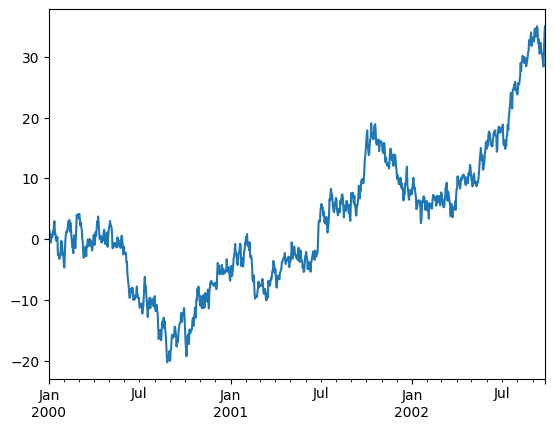

In [308]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()
ep

<Figure size 640x480 with 0 Axes>

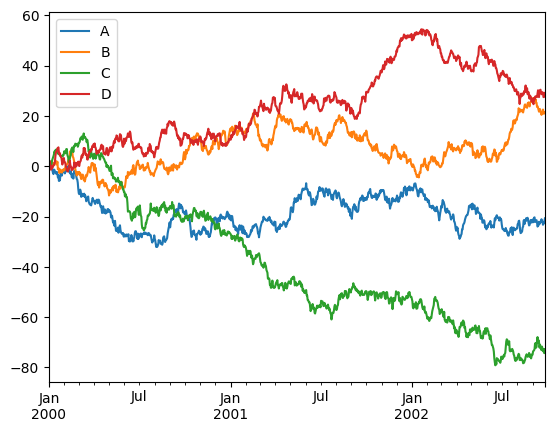

In [313]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list('ABCD'))
df = df.cumsum()

plt.figure()
df.plot()
plt.legend(loc='best')

# 데이타 입출력


In [325]:
df.to_csv('data/foo.csv')

In [326]:
pd.read_csv('data/foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,-1.148513,0.745167,-0.802304,0.937228
1,2000-01-02,0.743202,0.893021,1.270171,2.217263
2,2000-01-03,1.554900,0.545962,1.836476,1.477924
3,2000-01-04,1.082144,1.695318,0.994144,0.079818
4,2000-01-05,1.744913,1.814313,0.944450,-1.364398
...,...,...,...,...,...
995,2002-09-22,-23.266514,22.535274,-73.420763,28.944491
996,2002-09-23,-22.683555,20.977380,-72.725319,27.488130
997,2002-09-24,-22.688888,21.602693,-74.140445,27.513403
998,2002-09-25,-21.630948,20.978404,-74.294993,29.204323


In [327]:
df.to_excel('data/foo.xlsx', sheet_name='Sheet1')
pd.read_excel('data/foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,Unnamed: 0,A,B,C,D
0,2000-01-01,-1.148513,0.745167,-0.802304,0.937228
1,2000-01-02,0.743202,0.893021,1.270171,2.217263
2,2000-01-03,1.554900,0.545962,1.836476,1.477924
3,2000-01-04,1.082144,1.695318,0.994144,0.079818
4,2000-01-05,1.744913,1.814313,0.944450,-1.364398
...,...,...,...,...,...
995,2002-09-22,-23.266514,22.535274,-73.420763,28.944491
996,2002-09-23,-22.683555,20.977380,-72.725319,27.488130
997,2002-09-24,-22.688888,21.602693,-74.140445,27.513403
998,2002-09-25,-21.630948,20.978404,-74.294993,29.204323


# Gotchas

In [328]:
if pd.Series([False, True, False]):
    print('I was true ')


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().